In [20]:
jj=[]
seq='((1*(4+9))-5)'
res=''
for i in seq:
    if i == ')':
        
        while jj[-1] != '(': 
            res+=jj.pop()
        jj.pop()
    elif i == '(':
        
        
    elif i in '+-(*/':
        if jj and jj[-1] in '*/': 
                if i == ')':
        
                    while jj[-1] != '(': 
                        res+=jj.pop()
                    jj.pop()
                res+=jj.pop()
        jj.append(i)

    else:
        res+=i
print(res)

1*49+5-


In [ ]:
def infix_to_postfix(expression):
    precedence = {'+': 1, '-': 1, '*': 2, '/': 2, '^': 3}
    stack = []
    postfix = ''

    for char in expression:
        if char.isalnum():
            postfix += char
        elif char == '(':
            stack.append(char)
        elif char == ')':
            while stack and stack[-1] != '(':
                postfix += stack.pop()
            stack.pop()  # Discard the opening parenthesis
        else:
            while stack and stack[-1] != '(' and precedence[char] <= precedence.get(stack[-1], 0):
                postfix += stack.pop()
            stack.append(char)

    while stack:
        postfix += stack.pop()

    return postfix


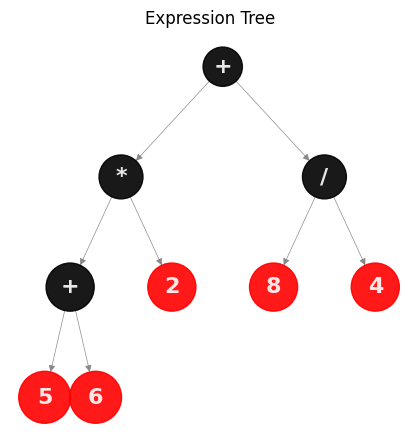

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def is_operator(token):
    return token in "+-*/n"

def construct_expression_tree(postfix:str):
    stack = []
    tokens = postfix.split()

    for token in tokens:
        if is_operator(token):
            if token=='n':
                right_operand = stack.pop()
                node = Node(token)
                node.right = right_operand
                stack.append(node)
            else :
                right_operand = stack.pop()
                left_operand = stack.pop()
                node = Node(token)
                node.left = left_operand
                node.right = right_operand
                stack.append(node)
        else:
            stack.append(Node(token))

    return stack.pop()

def draw_expression_tree(root):
    G = nx.DiGraph()
    node_labels = {}
    node_colors = {}

    def assign_colors(node:Node):
        if node is None:
            return

        if is_operator(node.value):
            node_colors[node] = 'black'
        else:
            node_colors[node] = 'red'

        if node.left:
            assign_colors(node.left)

        if node.right:
            assign_colors(node.right)

    def add_edges_and_labels(node:Node, level, pos):
        if node is None:
            return pos

        node_labels[node] = node.value
        G.add_node(node, pos=(pos, -level))
        pos_left = add_edges_and_labels(node.left, level+1, pos-2**(max_level-level-1))
        pos_right = add_edges_and_labels(node.right, level+1, pos+2**(max_level-level-1))
        if node.left:
            G.add_edge(node, node.left)
        if node.right:
            G.add_edge(node, node.right)

        return (pos_left + pos_right) / 2

    def get_tree_height(node:Node):
        if node is None:
            return 0
        return 1 + max(get_tree_height(node.left), get_tree_height(node.right))

    max_level = get_tree_height(root)
    assign_colors(root)
    pos_root = add_edges_and_labels(root, 0, 0)

    pos = nx.get_node_attributes(G, 'pos')
    node_color_list = [node_colors[node] for node in G.nodes()]
    node_size_list = [200 * (max_level - pos[node][1]) for node in G.nodes()]

    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels=True,font_color='white', labels=node_labels, node_color=node_color_list, node_size=node_size_list,
            font_size=16, font_weight="bold", edge_color="gray", width=0.5, alpha=0.9)
    plt.title("Expression Tree")
    plt.axis('off')
    plt.show()


# Test the code
postfix = "5 6 + 2 * 8 4 / +"
root = construct_expression_tree(postfix)
draw_expression_tree(root)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot

# Define operators and their priorities
operators = {'→': 1, '↔': 1, '∩': 2, '∪': 2, '¬': 3}

# Convert the expression to postfix notation
def convert_expression(expression):
    stack = []
    output = []
    for token in expression:
        if token in operators:
            while stack and stack[-1] in operators and operators[token] >= operators[stack[-1]]:
                output.append(stack.pop())
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()  # Remove the opening parenthesis
        else:
            output.append(token)
    
    while stack:
        output.append(stack.pop())

    return output

# Create a logic tree respecting levels
def create_logic_tree(expression):
    stack = []
    postfix_expression = convert_expression(expression)
    G = nx.DiGraph()

    level = 0
    level_dict = {0: ['Root']}
    current_node = 'Root'
    
    for token in postfix_expression:
        if token in operators:
            right = stack.pop()
            left = stack.pop()
            stack.append(token)
            
            G.add_node(token)
            G.add_edge(token, left)
            G.add_edge(token, right)
            
            if level not in level_dict:
                level_dict[level] = []
            level_dict[level].append(token)
        else:
            stack.append(token)
            
            if current_node in level_dict[level]:
                level += 1
            
            current_node = token
            G.add_node(token)
            G.add_edge(current_node, token)

    return G

# Logical expression
logical_expression = "(A ∩ B) → (C ∪ D)"

# Create the logic tree
logic_tree = create_logic_tree(logical_expression)

# Create a Pydot graph for visualization
dot_tree = nx.drawing.nx_pydot.to_pydot(logic_tree)
dot_tree.set_rankdir("TB")

# Draw the logic tree
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.title("Logical Tree")
plt.imshow(plt.imread(pydot.graph_from_dot_data(dot_tree.to_string())[0].create_png()))
plt.show()


In [12]:
import sys

def draw_tree_as_ascii(postfix_string):
  """Draws a tree from a postfix string in the following format:


  Args:
    postfix_string: A string containing the postfix expression of the tree.

  Returns:
    A string representing the tree in the specified format.
  """

  stack = []
  for token in postfix_string:
    if token in ['>', '|', '&']:
      # Pop the last two nodes from the stack and create a new node with the
      # given operator as its root.
      right = stack.pop()
      left = stack.pop()
      node = f'{token}>\n /  \\\n {left}  {right}'
      stack.append(node)
    else:
      # Create a new leaf node with the given token as its value.
      node = f'{token}'
      stack.append(node)

  # The root node of the tree is the last node on the stack.
  tree = stack.pop()

  # Return the tree string.
  return tree

def main():
  if len(sys.argv) != 2:
    print("Usage: python draw_tree.py <postfix_string>")
    sys.exit(1)

  postfix_string = sys.argv[1]

  tree_string = draw_tree_as_ascii(postfix_string)

  print(tree_string)

if __name__ == '__main__':
  main()

Usage: python draw_tree.py <postfix_string>


SystemExit: 1

C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
